# <center>Shunting Yard 

In [1]:
import matplotlib.pyplot as plt
import copy as c
from graphviz import Digraph
import matplotlib.image as img

# Shunting Yard function is to shift from infix to postfix notation
# Postfix notation is eaiser for compiler to read
# For example, 1 + 5 will turn into 1 5 +
# More info      https://gregorycernera.medium.com/converting-regular-expressions-to-postfix-notation-with-the-shunting-yard-algorithm-63d22ea1cf88
def shunting(infix):   

    postfix = ""
    op_stack = ""

    op = {'+': 4, '*': 3, '.': 2, '|': 1}       # precedence

    for i in infix:
        if (i == '('):
            
            op_stack += i 
        elif (i == ')'):
            
            while op_stack[-1] != '(':
                
                postfix = postfix + op_stack[-1]
                op_stack = op_stack[:-1]

            op_stack = op_stack[:-1]
        elif (i in op):
            
            while (op_stack and op.get(i, 0) <= op.get(op_stack[-1], 0)):       # precedence check, defualt 0
                
                postfix = postfix + op_stack[-1]
                op_stack = op_stack[:-1]

            op_stack += i 
        else:
            postfix += i 

    while (op_stack):
        
        postfix = postfix + op_stack[-1]
        op_stack = op_stack[:-1]
        
    return postfix

# <center>Thompson’s Construction

In [2]:


class nfa:                             # NFAs are classes with starting_s and accept_s state 
    starting_s = None
    accept_s = None


    def __init__(self, starting_s, accept_s):
        self.accept_s = accept_s       
        self.starting_s = starting_s

    

class state:                            # States are classes
    term = None                         # each state have terminals, edges, randomly generated id for drawing
    prim_edge = None
    second_edge = None
    id = None
    
    instances = []
    
    def __init__(self, idd):                        
        self.id = idd
        # Quick way to save all class instances in a list
        self.__class__.instances.append(self)       

        

def IDs(c):
    # id = random.choice(id_list)
    # random.seed(10)
    #id_list.remove(id)
    id = str(c)
    return id 


def Thompson(postfix):               
 # Thompson’s Construction divide The NFA into small NFAs and push them in nfatack
 # then pop them as soon as we hit any operator (+,*,.,|) 
 # More info              https://medium.com/swlh/visualizing-thompsons-construction-algorithm-for-nfas-step-by-step-f92ef378581b 
    NFAlist = []
    c=0
    
    for i in postfix:

        if i == '.':
            
            nfa2 = NFAlist.pop() 
            nfa1 = NFAlist.pop()

            nfa1.accept_s.prim_edge = nfa2.starting_s

            newNFA = nfa(nfa1.starting_s, nfa2.accept_s)
            NFAlist.append(newNFA)

        elif i == '|':
    
            nfa2 = NFAlist.pop() 
            nfa1 = NFAlist.pop()

            starting_s = state(IDs(c)); c+=1

            starting_s.prim_edge = nfa1.starting_s
            starting_s.second_edge = nfa2.starting_s

            accept_s = state(IDs(c)); c+=1

            nfa1.accept_s.prim_edge = accept_s
            nfa2.accept_s.prim_edge = accept_s


            newNFA = nfa(starting_s, accept_s)
            NFAlist.append(newNFA)
                    
        elif i == '*':

            nfa1 = NFAlist.pop() 

            starting_s = state(IDs(c)); c+=1
            accept_s = state(IDs(c)); c+=1

            starting_s.prim_edge = nfa1.starting_s
            starting_s.second_edge = accept_s
            
            nfa1.accept_s.prim_edge = nfa1.starting_s
            nfa1.accept_s.second_edge = accept_s

            newNFA = nfa(starting_s, accept_s)
            NFAlist.append(newNFA)
            
        elif i == '+':
    
            nfa1 = NFAlist.pop()

            starting_s = state(IDs(c)); c+=1
            accept_s = state(IDs(c)); c+=1

            starting_s.prim_edge = nfa1.starting_s
            
            nfa1.accept_s.prim_edge = nfa1.starting_s
            nfa1.accept_s.second_edge = accept_s

            newNFA = nfa(starting_s, accept_s)
            NFAlist.append(newNFA)
            
        else:

            starting_s = state(IDs(c)); c+=1
            accept_s = state(IDs(c)); c+=1

            starting_s.term = i 
            
            starting_s.prim_edge = accept_s 

            newNFA = nfa(starting_s, accept_s)
            NFAlist.append(newNFA)
    

    return NFAlist.pop()



# <center>Subset Construction

In [3]:
class state:                            # States are classes
    term = None                         # each state have terminals, edges, randomly generated id for drawing
    prim_edge = None
    second_edge = None
    id = None
    
    instances = []
    
    def __init__(self, idd):                        
        self.id = idd
        # Quick way to save all class instances in a list
        self.__class__.instances.append(self)     



def Subset(infix,for_nfa):


# Subset Construction                                #example:  [[{'0', '4', '2'}, 'a', {'3', '6', '5'}], [{'0', '4', '2'}, 'b', {'1','8'}]]
    def nextstate(current_states, term):
        # one big state that includes all edges of input states
        biggest_edge = set()                           
        stack = c.deepcopy(current_states)

        if term != 'ε':
            # a state that includes all edges of input states that include input terminal
            big_edge = set()                        
            for j in range(len(current_states)):    
                current = stack.pop()
                # First step: check all input states that use the same terminal to reach an edge
                #             add thier edges to one state
                for i in nfa_trans:                       
                    if i[0] == current and (i[1] == term):
                        biggest_edge.add(i[2])           # returned set
                        big_edge.add(i[2])              # for loop set
            stack = big_edge
            #print("firststep: ",big_edge)
            
            
        # Second step: check all output states that have epsillon
        #              add thier edges to one state  
        while(stack):
            current = stack.pop()
            biggest_edge.add(current)
            for i in nfa_trans:
                if i[0] == current and (i[1] == "ε"):      
                    stack.add(i[2])                           
        #print("secondstep: ",biggest_edge)
        return biggest_edge


    
    Q, nfa_trans, startstate, finalstate = nfa_data(infix=infix, for_nfa=for_nfa)     

    terminals = set([i[1] for i in nfa_trans])
    terminals.discard('ε')
    
    startstate = {startstate}               # dfa start will be a set
    states = []
    states.append(nextstate(startstate, 'ε'))    # step 0: start from all states that intitial state can reach using epsillon
    dfa_trans = []
    dfastartstate = states[0]
    s_count = 0
    new_states = True

    #Loop through states
    #Stop when there is no more new states to add 
    #And we moved through all other new states 
    while new_states or s_count != len(states): 
        new_states = False     # to be changed later when we find a new state

        # loop through every terminal
        for i in terminals:                                    
            dfa_s = nextstate(states[s_count], i)
            dfa_trans.append([states[s_count], i, dfa_s])
            if dfa_s not in states:
                new_states = True
                # if the destination state is not in new states, add it, then continue searching for new states                            
                states.append(dfa_s)
        s_count += 1


    automata_accept = []
    for i in states:
        if finalstate.issubset(i):               #if old acceptance state is part of a new state then this new state is a new acceptance state  
            automata_accept.append(i)
    
    
    
    automata_transitions = {}
                                    #            i    j    k
    for i, j, k in dfa_trans:       #example: [['μ', '0', 'φ'], ['u', '1', 'w'], ['r', 'ε', 'e']]
        
        if len(i) == 0:             #if the set is empty (nameless state) then it is the dead state
            string_i = "GraveYard"
        else:    
            string_i = ",".join(i)
            
        if len(k) == 0:
            string_k = "GraveYard"
        else:    
            string_k = ",".join(k)

        
        if j == "1":                        # to get result like this 'GraveYard': {'0': 'GraveYard', '1': 'GraveYard'} for drawing
            automata_transitions[string_i][j] = string_k
        else:
            automata_transitions[string_i] = {j : string_k}
        
    
    
    automata_states = []
    for i in automata_transitions.keys():
        automata_states.append(i)
        
    
    for i in range(len(automata_accept)):
        dfa_final = ","
        automata_accept[i] = dfa_final.join(automata_accept[i])         # create a shape of 1,2,3 for drawing
 
        
    dfa_start = ","
    automata_start = dfa_start.join(dfastartstate)

    
    return automata_states, automata_transitions, automata_start, automata_accept


# <center>Draw NFA/DFA

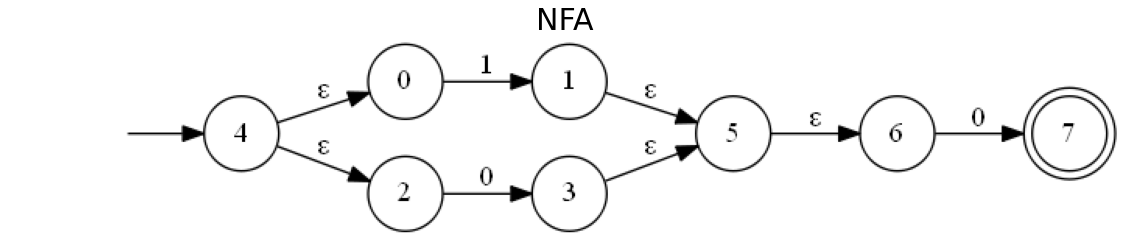

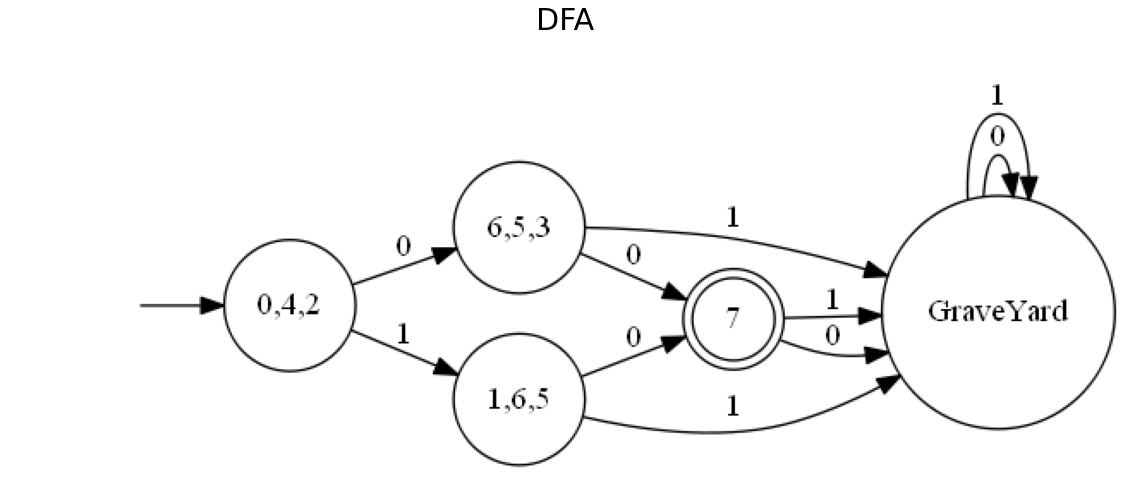

In [4]:
class state:                            # States are classes
    term = None                         # each state have terminals, edges, randomly generated id for drawing
    prim_edge = None
    second_edge = None
    id = None
    
    instances = []
    
    def __init__(self, idd):                        
        self.id = idd
        # Quick way to save all class instances in a list
        self.__class__.instances.append(self)    


def nfa_data(infix, for_nfa):
    postfix = shunting(infix)
    nfa = Thompson(postfix)
    
    states_ids = []
    
    if for_nfa == True:
      trans = {}
      for instance in state.instances:     
          states_ids.append(instance.id)
          
          if (instance.prim_edge != None):
              
              if (instance.second_edge != None):
                  dic = {instance.term : {instance.prim_edge.id, instance.second_edge.id}}
              else:
                  dic = {instance.term : instance.prim_edge.id}
                  
              trans[instance.id] = dic
            
            
    if for_nfa == False:        
      trans = []
      for instance in state.instances:     
          states_ids.append(instance.id)
          
          if instance.term == None:
              instance.term = "ε"
          
          if (instance.prim_edge != None):
              dic = [instance.id, instance.term, instance.prim_edge.id]
              trans.append(dic)
              
              if (instance.second_edge != None):
                  dic = [instance.id, instance.term, instance.second_edge.id]#[instance.term : instance.prim_edge.id]
                  trans.append(dic)
            
              #print(trans)
            
    automata_states = states_ids                                
    automata_transitions = trans
    automata_starting_s = nfa.starting_s.id
    automata_accept_s = {nfa.accept_s.id}
    
    return automata_states, automata_transitions, automata_starting_s, automata_accept_s
         

def draw(infix, for_nfa):                                    

    # Data needed for drawing
    
    if for_nfa == True:
      automata_states, automata_transitions, automata_starting_s, automata_accept_s = nfa_data(infix, for_nfa) 
    if for_nfa == False:
      automata_states, automata_transitions, automata_starting_s, automata_accept_s = Subset(infix, for_nfa,) 

    # Drawing using Python Graphiz Digraph
    if for_nfa == True:
      Graph = Digraph(name="NFA Graph", format='png')
    if for_nfa == False:
      Graph = Digraph(name="DFA Graph", format='png')                 
    Graph.graph_attr['rankdir'] = 'LR'
    Graph.node("", "", shape='plaintext')
    
    for i in automata_accept_s:
      Graph.node(i, i, shape='doublecircle')
    
    
    for i in automata_states:
      if i not in automata_accept_s:
        Graph.node(i, i, shape='circle')
    
    Graph.edge("", automata_starting_s, label="")
    
    
    for i in automata_transitions:
      for j in automata_transitions[i]:
          if for_nfa == True:
              for k in automata_transitions[i][j]:
                
                if j == None:
                  Graph.edge(i, k, label='ε')
                  
                else:
                  Graph.edge(i, k, label=j)
                
                
          if for_nfa == False:
              Graph.edge(i, automata_transitions[i][j], label=j)    
                   
    Graph.render()
    
    if for_nfa == True:
      image = img.imread('NFA Graph.gv.png')
    if for_nfa == False:
      image = img.imread('DFA Graph.gv.png')  
      
    plt.figure(figsize = (20,20))
    plt.imshow(image)
    plt.axis('off')
    
    if (for_nfa == True):
      plt.title("NFA",fontsize=30)
    if (for_nfa == False):
      plt.title("DFA", fontsize=30)
    plt.show() 

  
draw("(1|0).0", for_nfa= True)       # NFA
draw("(1|0).0", for_nfa= False)      # DFA

# <center>Acceptance Test 

In [11]:
# Function to skip epsillon transitions while running through the NFA to check the acceptance  
def skip_nxt_epsillon_trans(state):          

    states = set()
    states.add(state)


    if state.term == None:                                              # None is Epsillon

        if state.prim_edge:

            states |= skip_nxt_epsillon_trans(state.prim_edge)          # (|=) is union with equal for sets

        if state.second_edge:

            states |= skip_nxt_epsillon_trans(state.second_edge)

    # return only states with no epsillon
    return states       





# check acceptance for a given regex and string
# if we reach the acceptance_state using the given string then it is accepted 
def Acceptance_test(infix, string):

    postfix = shunting(infix)
    nfa = Thompson(postfix)

    nxt_states = set()
    states = set()
    states |= skip_nxt_epsillon_trans(nfa.starting_s)

    for i in string:
        for j in states:
            if j.term == i:

                nxt_states |= skip_nxt_epsillon_trans(j.prim_edge)           #prim_edge always has the non epsillon terminal in Thompson 

        states = nxt_states
        nxt_states = set()
    
    test = nfa.accept_s in states
    return(test)                    #if it gets to the accept state then it is accepted 

Acceptance_test("(0|1)|(1.1)", "11")

True

In [39]:
import tkinter as tk


# check acceptance for a given regex and string
# if we reach the acceptance_state using the given string then it is accepted 
def Acceptance_test():

    postfix = shunting(infix.get())
    nfa = Thompson(postfix)

    nxt_states = set()
    states = set()
    states |= skip_nxt_epsillon_trans(nfa.starting_s)

    for i in string.get():
        for j in states:
            if j.term == i:

                nxt_states |= skip_nxt_epsillon_trans(j.prim_edge)           #prim_edge always has the non epsillon terminal in Thompson 

        states = nxt_states
        nxt_states = set()
    
    test = nfa.accept_s in states
    
    if test == True:
        result.configure(text= "True")
    if test == False:
        result.configure(text= "False") 
    return(test)                    #if it gets to the accept state then it is accepted 

#Acceptance_test("(0|1)|(1.1)", "11")



window = tk.Tk()
window.title("Regex Acceptance Test")
window.geometry('400x200')
centered = tk.Label(text="Enter infix")
infix = tk.Entry(width=50)
centered1 = tk.Label(text="Enter string")
string = tk.Entry(width=50)
# name = entry.get()
# name1 = entry1.get()
button = tk.Button(window, text='acceptance', width=25, command=lambda: Acceptance_test())

result=tk.Label(window, text="__Result__")

centered.pack()
infix.pack()
centered1.pack()
string.pack()
button.pack()
result.pack()
window.mainloop()



